#  Comparative Analysis of NLTK and spaCy

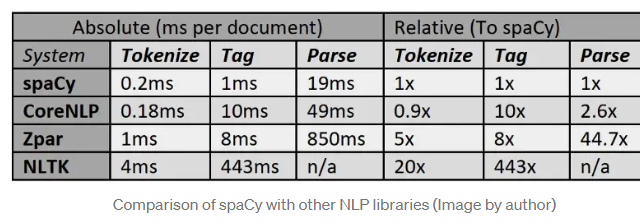

Both NLTK and spaCy are important libraries for NLP. Some tasks are efficient in spaCy, and some are efficient in NLTK. We need to use both libraries in different circumstances, and let’s see some comparisons.

The above figure clearly indicates that spaCy is 20 times and 443 times faster than NLTK in the case of tokenization and tagging.

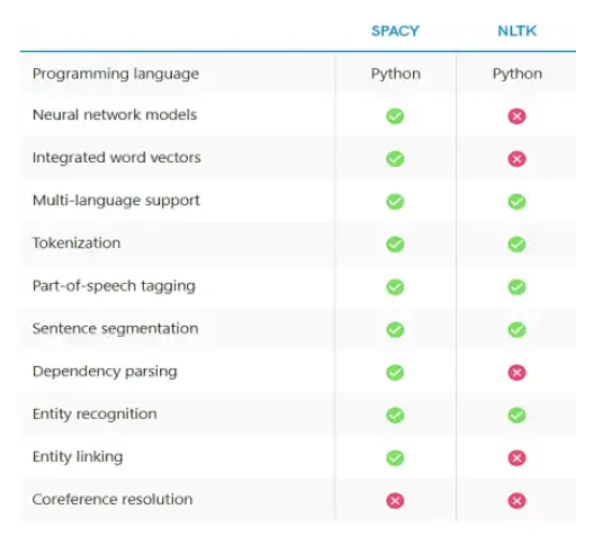

In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')

When we run the following piece of code, it will import the spaCy library and load the model to nlp . If we call the object nlp on a text, spaCy will tokenize the text and save it to a Doc object. After that, the Doc object is again passed through different steps, and the process is known as a pipeline. Generally, the pipeline contains tagger, lemmatizer, parser, and named entity recognizer. The following image clearly describes the pipeline process[

Tokenization with spaCy:

In [3]:
doc = nlp('"Let\'s go to N.Y.!"')
for token in doc:
    print(token.text)

"
Let
's
go
to
N.Y.
!
"


Named Entities with spaCy

In a sentence, a word or a group of words indicates names (e.g., Name of location, person, area, country, state, monetary values, and so on). The primary purpose of a named entity is to identify it. The named entities can be accessible with ents attributes of Doc object.

In [10]:
sentence = nlp(u'Google's monthly revenue is $6 million')

for token in sentence:
    print(token.text, end=' | ')

print('
______________________________________________________')

for ent in sentence.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

SyntaxError: invalid syntax (3060232205.py, line 2)

### Visualizing named entity

spaCy has a built-in visualizer to visualize the named entity. For doing so, we have to import displacy module from spaCy library. The following code shows the output as follows.

In [9]:
from spacy import displacy
doc = nlp(u'Over last few years USA generates $6 million revenue.')
displacy.render(doc, style='ent', jupyter=True)

### Visualizing the dependency

In [11]:
from spacy import displacy
document = nlp(u'Bangladesh is a beautiful country')
displacy.render(document, style='dep', jupyter=True, options={'distance': 110})

### Stemming with NLTK

##### Stemming means chopping the words/ tokens to find out their root words. But it doesn’t always provide meaningful strings. The spaCy library doesn’t have any stemmer; instead, it entirely relies on lemmatization.

In [12]:
import nltk
from nltk.stem.porter import *
p_stemmer = PorterStemmer()
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


In [13]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


### Lemmatization and POS tagging with spaCy

In [14]:
doc = nlp(u"He is a runner running in a competition because he loves to run since he ran today")

for token in doc:
    print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

He           PRON   1655312771067108281    he
is           AUX    10382539506755952630   be
a            DET    11901859001352538922   a
runner       NOUN   12640964157389618806   runner
running      VERB   12767647472892411841   run
in           ADP    3002984154512732771    in
a            DET    11901859001352538922   a
competition  NOUN   4661638505416061516    competition
because      SCONJ  16950148841647037698   because
he           PRON   1655312771067108281    he
loves        VERB   3702023516439754181    love
to           PART   3791531372978436496    to
run          VERB   12767647472892411841   run
since        SCONJ  10066841407251338481   since
he           PRON   1655312771067108281    he
ran          VERB   12767647472892411841   run
today        NOUN   11042482332948150395   today


### Stop Words with spaCy

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')
print(nlp.Defaults.stop_words)

{'go', 'up', 'nine', 'hereupon', '‘ve', 'must', 'forty', 'also', 'who', 'whether', 'n’t', 'yet', 'twenty', 'are', 'anyway', 'although', 'be', 'each', 'were', 'see', 'enough', 'during', 'four', "n't", 'less', 'nor', 'used', 'rather', 'serious', 'move', 'their', 'what', 'amongst', 'or', 'whom', 'throughout', 'its', 'down', 'wherein', "'ve", 'there', '‘s', 'keep', 'them', 'five', 'himself', 'beside', 'seeming', 'our', 'if', 'even', 'both', 'cannot', 'own', 'same', 'three', 'off', 'ours', 'full', "'s", 'all', 'you', 'around', 'every', 'regarding', 'herself', 'seems', 'part', 'take', 'towards', 'in', 'became', 'my', 'is', 'been', 'we', '‘d', 'herein', 'least', 'behind', 'alone', 'to', 'latter', 'had', 'become', 'everywhere', 'whoever', 'over', 'how', 'quite', 'fifty', 'being', 'hereafter', 'somehow', 'anywhere', 'back', 'made', 'may', 'noone', 'themselves', 'such', 'onto', 'really', 'as', 'into', 'nevertheless', 'here', 'nobody', 'therefore', 'mine', 'already', 'none', 'empty', 'moreover', 

### Checking a specific token whether it is a stop word or not.

In [16]:
nlp.vocab['myself'].is_stop

True

In [17]:
nlp.vocab['mystery'].is_stop

False

###  Adding and removing a stop word to the default spaCy stop words list

In [19]:
nlp.Defaults.stop_words.add('btw')

In [21]:
nlp.Defaults.stop_words.remove('hers')

### Creating matcher with spaCy

##### Rule-based Matcher

In [28]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [26]:
pattern_1 = [{'LOWER': 'solarpower'}]
pattern_2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern_3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]
matcher.add('SolarPower', None, pattern1, pattern2, pattern3)

TypeError: add() takes exactly 2 positional arguments (5 given)

Applying the matcher to a doc object.

In [30]:
for match_id, start, end in found_matches:
    # get string representation
    string_id = nlp.vocab.strings[match_id]
    # get the matched span
    span = doc[start:end]       
    print(match_id, string_id, start, end, span.text)